# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [5]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned ON


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

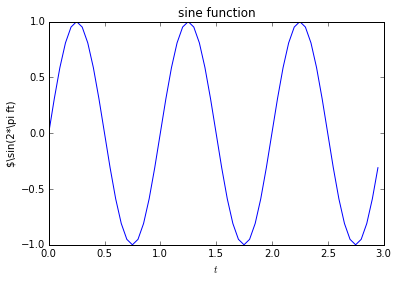

In [12]:
x = np.arange(0,3*1.,1./20)
y = np.sin(2*np.pi*1*x)

plt.plot(x,y)
plt.xlabel(r'$t in sec$')
plt.ylabel(r'$\sin(2*\pi ft)')
plt.title('sine function')

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

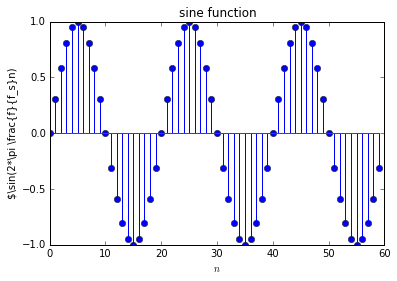

In [13]:
x = np.arange(0,3*1.,1./20)
y = np.sin(2*np.pi*1*x)

plt.stem(y)
plt.xlabel(r'$n$')
plt.ylabel(r'$\sin(2*\pi \frac{f}{f_s}n)')
plt.title('sine function')

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

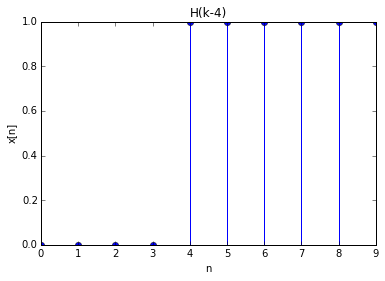

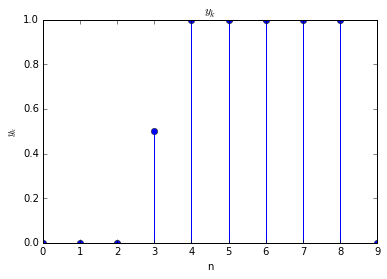

In [28]:
def step(n=0, N=20):
    if n > N-1:
        raise ValueError('n should be in 0 to N-1')
    s = np.zeros((N,))
    s[n:N] = 1
    return s
x = step(4,10)
plt.figure()
plt.stem(x)
plt.title('H(k-4)')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()


y = np.zeros((10,))
for i in range(9):
    y[i] = (x[i] + x[i+1])/2

plt.figure()
plt.stem(y)
plt.title('$y_k$')
plt.xlabel('n')
plt.ylabel('$y_k$')
plt.show()

**1.2** Propose a modification to obtain a causal version

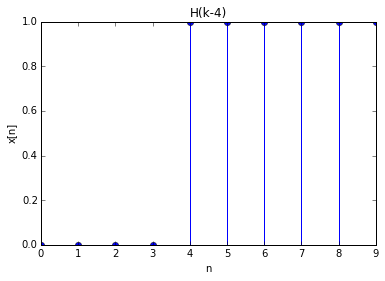

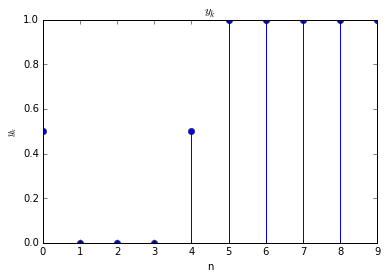

In [65]:
x = step(4,10)
plt.figure()
plt.stem(x)
plt.title('H(k-4)')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()


y = np.zeros((10,))
for i in range(10):
    y[i] = (x[i] + x[i-1])/2

plt.figure()
plt.stem(y)
plt.title('$y_k$')
plt.xlabel('n')
plt.ylabel('$y_k$')
plt.show()

Comments on your observations

Causal system is "non anticipative" system so it should depend on only past and present values. so we define system as $y_k$ = $(x_k + x_{k-1})/2$

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



<Container object of 3 artists>

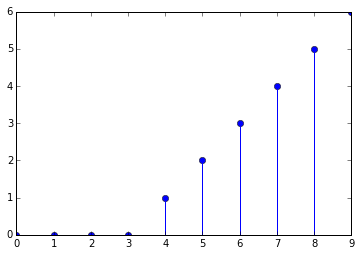

In [66]:
def prim(f):
    s = np.zeros((len(f),))
    s[0] = f[0]
    for i in range(1,len(f)):
        s[i] = f[i] +s[i-1]
    return s

w = prim(x)
plt.stem(w)

In [67]:
def dirac(n=0, N=20):
    if n > N-1:
        raise ValueError('n should be in 0 to N-1')
    s = np.zeros((N, ))
    s[n] = 1
    return s


**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

<Container object of 3 artists>

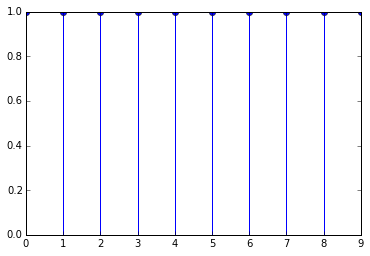

In [68]:
x = dirac(0,10)

g = prim(x)
plt.stem(g)


**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

<Container object of 3 artists>

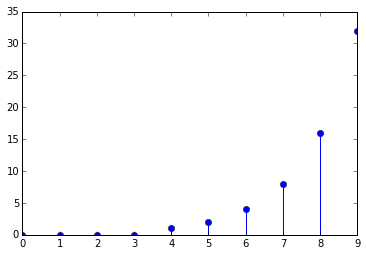

In [85]:

x = dirac(4,10)
y[0] = x[0]

for i in range(1,10):
    y[i] = x[i] + 2*y[i-1]


plt.stem(y)


**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

<Container object of 3 artists>

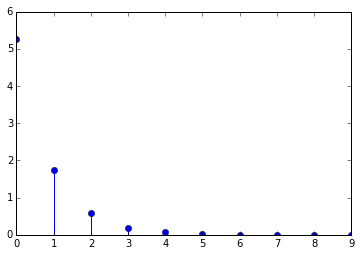

In [88]:
x = dirac(0,10)
y[0] = x[0]
for i in range(10):
    y[i] = x[i] + y[i-1]/3

plt.stem(y)

Comments your observations

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


<Container object of 3 artists>

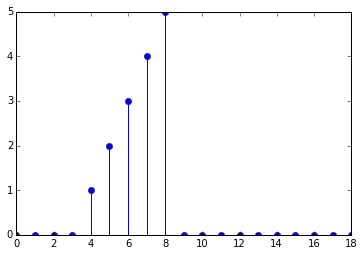

In [96]:
xa = np.zeros((19,))
xa[4:9] = np.linspace(1,5,num =5)

xb = np.zeros((19,))
xa[4:9] = np.linspace(1,5,num =5)

**3.2** Prove the system defined by the previous equation is linear (and invariant). Write the equation as a convolution equation.


**3.3** Propose a nonlinear/noninvariant system.